<a href="https://colab.research.google.com/github/Harshanand7/projects/blob/main/photo_face_attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement (2):- Photo face attendance

Take a subset of 10 unique faces, each with multiple images in the
database. Write an OpenCV program, which when given a reference face
and a set of different face images, matches the most likely image to
the reference face. You can use Python or C++ to do this. Share the
code as a public Github repository.

In [1]:
!pip install gdown


In [2]:
!pip install opencv-python

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np
import requests
import zipfile
import io
from pathlib import Path
import gdown





## About the dataset
The 'AT&T Database of Faces' has the images of 40 different persons. It has 10 images of each persons in '.pgm' format of size approximately 10kb each.
# Prepeocessing the dataset
I used the first 10 sets of images (s1-s10) for training my  face recogniser. I made a dataset which has file name '4-10' meaning this is the 10th image  of person 4

In [4]:
# this is the function to dsiplay the refernce image just to check whether the correct file is imported
def display_images_1(img_path):
    display_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(display_img, cmap='gray')
    plt.title("Image Display")
    plt.axis('off')


    plt.show()

If you want to display any image of your choice then paste the link here by uncommenting the below 2 lines of code

In [5]:


#img_path = '/content/drive/MyDrive/s1/5.pgm'


#display_images_1(img_path)

# in the next code block I have also extractd the link of images from my google drive in case you don't have the link of images


In [6]:
# this is the fileid and url of the images stored in my google drive
file_id = '1qLydPiV6488yKH40AzFxiqQYDaqEZn-L'
url = f'https://drive.google.com/uc?id={file_id}'

# output file name
output_img = 'img.png'

# downloading the file
gdown.download(url, output_img, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1qLydPiV6488yKH40AzFxiqQYDaqEZn-L
To: /content/img.png
100%|██████████| 10.3k/10.3k [00:00<00:00, 6.61MB/s]


'img.png'

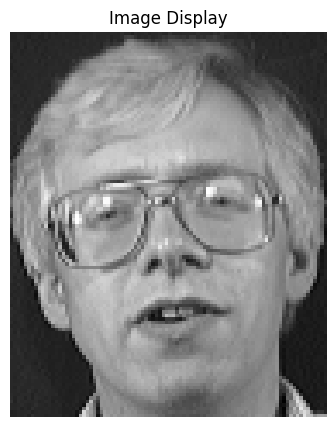

In [7]:
# path to the downloaded image
img_path = output_img

# calling the function to display the image
display_images_1(img_path)

In [8]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".pgm"):
            img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                label = int(filename.split('-')[0])
                images.append(img)
                labels.append(label)
            else:
                print(f"Failed to load image: {filename}")
        else:
            print(f"Skipping non-pgm file: {filename}")
    return images, labels


## Algorithm Used
I have used LBPH model of Opencv as my face recogniser algorithm. It uses the metrics called confidence level to get the most matched face.
Lower the confidence level better is the face matched.

Ideally for a similar face the confidence value should lie between 0-50 and for very dissimilar face the value goee beyond 60.

In [9]:
def train_lbph_model(images, labels):
    if len(images) == 0 or len(labels) == 0:
        raise ValueError("No training data provided")
    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(images, np.array(labels))
    return model

In [10]:
def predict_face(model, reference_face_path):
    reference_face = cv2.imread(reference_face_path, cv2.IMREAD_GRAYSCALE)
    if reference_face is None:
        raise ValueError(f"Failed to load reference face image from path: {reference_face_path}")
    label, confidence = model.predict(reference_face)
    return label, confidence


 I have uploaded the training images in ly github repository and in the next block i extracted all files from there

In [11]:


# URL of the zip file on GitHub
github_zip_url = "https://github.com/Harshanand7/projects/raw/main/images.zip"

# directory to extract the images
extracted_folder = "extracted_images"
image_folder = os.path.join(extracted_folder, "images")

# creating the directory if it doesn't exist
if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

# downloading the zip file
response = requests.get(github_zip_url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# extracting the zip file
zip_file.extractall(extracted_folder)

# closing the zip file
zip_file.close()

# listing the extracted files
file_names = os.listdir(extracted_folder)
print("Extracted folders:", file_names)

# listing files in the images folder
image_file_names = os.listdir(image_folder)
print("Extracted image files:", image_file_names)

# loading images and labels
images, labels = load_images_from_folder(image_folder)
print(f"Loaded {len(images)} images and {len(labels)} labels.")

Extracted folders: ['images']
Extracted image files: ['10-2.pgm', '8-10.pgm', '9-7.pgm', '9-3.pgm', '7-3.pgm', '8-5.pgm', '1-6.pgm', '3-7.pgm', '7-4.pgm', '2-1.pgm', '8-6.pgm', '1-10.pgm', '6-6.pgm', '2-6.pgm', '8-2.pgm', '7-10.pgm', '1-1.pgm', '3-3.pgm', '6-2.pgm', '4-6.pgm', '10-1.pgm', '9-8.pgm', '4-9.pgm', '9-5.pgm', '1-2.pgm', '5-1.pgm', '5-10.pgm', '3-9.pgm', '7-8.pgm', '1-7.pgm', '7-9.pgm', '10-4.pgm', '9-4.pgm', '5-4.pgm', '7-6.pgm', '5-9.pgm', '10-6.pgm', '5-7.pgm', '10-3.pgm', '8-4.pgm', '10-10.pgm', '4-8.pgm', '4-5.pgm', '1-5.pgm', '8-7.pgm', '10-9.pgm', '1-3.pgm', '4-7.pgm', '2-2.pgm', '2-8.pgm', '10-7.pgm', '5-8.pgm', '4-3.pgm', '4-4.pgm', '6-5.pgm', '10-5.pgm', '8-1.pgm', '6-10.pgm', '9-1.pgm', '9-10.pgm', '6-7.pgm', '6-3.pgm', '6-9.pgm', '8-8.pgm', '3-5.pgm', '7-2.pgm', '4-1.pgm', '9-2.pgm', '5-3.pgm', '3-8.pgm', '5-2.pgm', '3-2.pgm', '9-6.pgm', '8-9.pgm', '7-1.pgm', '1-8.pgm', '6-1.pgm', '4-2.pgm', '3-1.pgm', '2-4.pgm', '2-5.pgm', '9-9.pgm', '7-7.pgm', '3-4.pgm', '3-6.p

In [12]:
def display_images(reference_img_path, matched_img_path):
    reference_img = cv2.imread(reference_img_path, cv2.IMREAD_GRAYSCALE)
    matched_img = cv2.imread(matched_img_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(reference_img, cmap='gray')
    plt.title("Reference Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(matched_img, cmap='gray')
    plt.title("Matched Image")
    plt.axis('off')

    plt.show()

## Tessting
The below code block is to check wheteher my face recognition is working properly. So I gave the image of label 1 which was already in the dataset to get a perfect match.
It is verified that the function is working properly as the confidence value is zero (the confdence value should be 0 for perfect match)

Downloading...
From: https://drive.google.com/uc?id=1CQVd2yFc_xgSYhKp2okpQT1Y2ZVTV-Ur
To: /content/test_1_img.png
100%|██████████| 10.3k/10.3k [00:00<00:00, 11.8MB/s]


Predicted label of image: 1, Confidence: 0.0


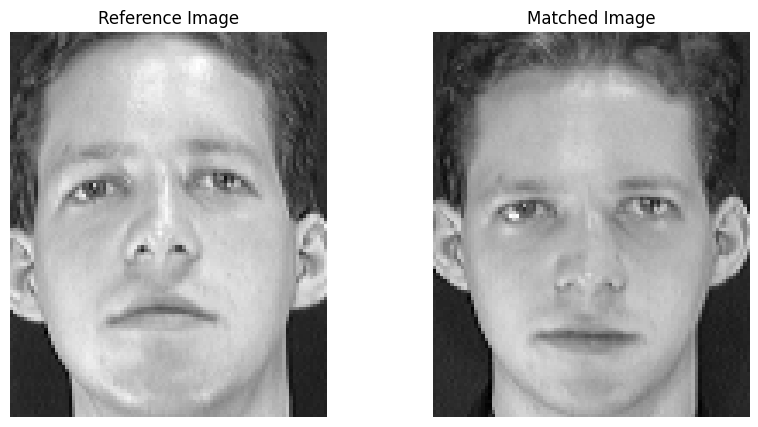

In [13]:
# training the LBPH model
model = train_lbph_model(images, labels)


# this is the fileid and url of the images stored in my google drive
file_id = '1CQVd2yFc_xgSYhKp2okpQT1Y2ZVTV-Ur'
url = f'https://drive.google.com/uc?id={file_id}'

# output file name
output_img_1 = 'test_1_img.png'

# downloading the file
gdown.download(url, output_img_1, quiet=False)

# loading the reference face
reference_face_path = output_img_1


# predicting the most likely matching image
predicted_label, confidence = predict_face(model, reference_face_path)
print(f"Predicted label of image: {predicted_label}, Confidence: {confidence}")

# displaying the reference face and the predicted face
predicted_face_path = os.path.join(image_folder, f"{predicted_label}-1.pgm")
display_images(reference_face_path, predicted_face_path)


# Application
In this block I have put one image of another dataset as reference image and passed it into the function to get the matched image.

We can also pass multiple images to match by doing some required changes.


The result shows predicted label as 7 meaning the matched face is of 7th person out  of 10 person.



Downloading...
From: https://drive.google.com/uc?id=1zA1ORSgEKvAkOBfWPc-_5xGOEgw1iY-d
To: /content/test_2_img.png
100%|██████████| 114k/114k [00:00<00:00, 47.2MB/s]


Predicted label of image: 7, Confidence: 93.85205735200044


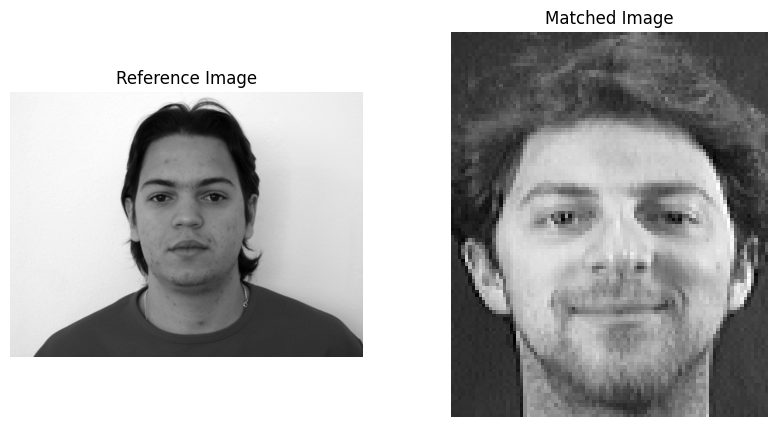

In [14]:



# training the LBPH model
model = train_lbph_model(images, labels)


# this is the fileid and url of the images stored in my google drive
file_id = '1zA1ORSgEKvAkOBfWPc-_5xGOEgw1iY-d'
url = f'https://drive.google.com/uc?id={file_id}'

# output file name
output_img_2 = 'test_2_img.png'

# downloading the file
gdown.download(url, output_img_2, quiet=False)

# loading the reference face
reference_face_path = output_img_2



# predicting the most likely matching image
predicted_label, confidence = predict_face(model, reference_face_path)
print(f"Predicted label of image: {predicted_label}, Confidence: {confidence}")

# displaying the reference face and the predicted face
predicted_face_path = os.path.join(image_folder, f"{predicted_label}-1.pgm")
display_images(reference_face_path, predicted_face_path)
